In [1]:
import pandas as pd

In [2]:
datos=pd.read_csv("Transmitancia_VeMN22_5g_limpio.csv")

In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   nm      361 non-null    float64
 1   %T      353 non-null    float64
dtypes: float64(2)
memory usage: 5.8 KB


In [4]:
datos.head()

,nm,%T
0,390.0,NaN
1,391.0,NaN
2,392.0,NaN
3,393.0,NaN
4,394.0,28.544


In [5]:
x=datos["nm"]
y=datos["%T"]

In [6]:
x

0      390.0
1      391.0
2      392.0
3      393.0
4      394.0
       ...  
356    746.0
357    747.0
358    748.0
359    749.0
360    750.0
Name: nm, Length: 361, dtype: float64

In [7]:
y

0         NaN
1         NaN
2         NaN
3         NaN
4      28.544
        ...  
356    89.628
357       NaN
358       NaN
359       NaN
360       NaN
Name: %T, Length: 361, dtype: float64

array([[<Axes: title={'center': 'nm'}>, <Axes: title={'center': '%T'}>]],
      dtype=object)

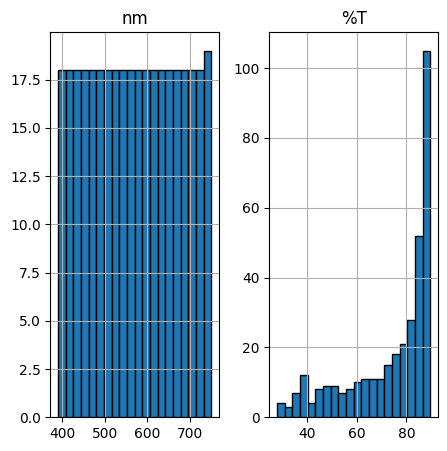

In [8]:
datos.hist(figsize=(5,5), bins=20, edgecolor="black")

In [9]:
type(x)

pandas.core.series.Series

In [10]:
type(y)

pandas.core.series.Series

In [11]:
x.describe()

count    361.000000
mean     570.000000
std      104.355961
min      390.000000
25%      480.000000
50%      570.000000
75%      660.000000
max      750.000000
Name: nm, dtype: float64

In [12]:
y.describe()

count    353.000000
mean      73.897210
std       16.888293
min       27.840000
25%       63.437000
50%       81.117000
75%       87.286000
max       89.628000
Name: %T, dtype: float64

<Axes: xlabel='nm', ylabel='%T'>

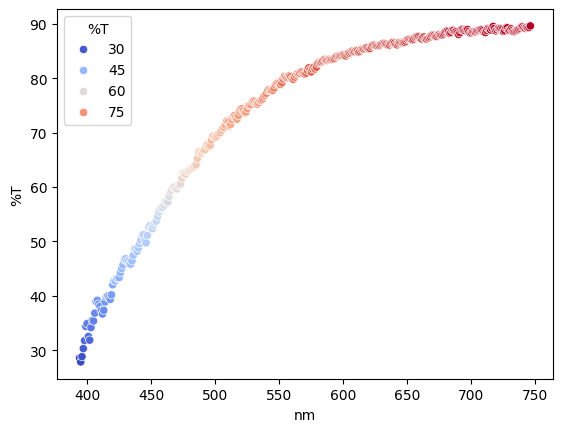

In [13]:
import seaborn as sb
sb.scatterplot(x=x, y=y, data=datos, hue="%T", palette="coolwarm")

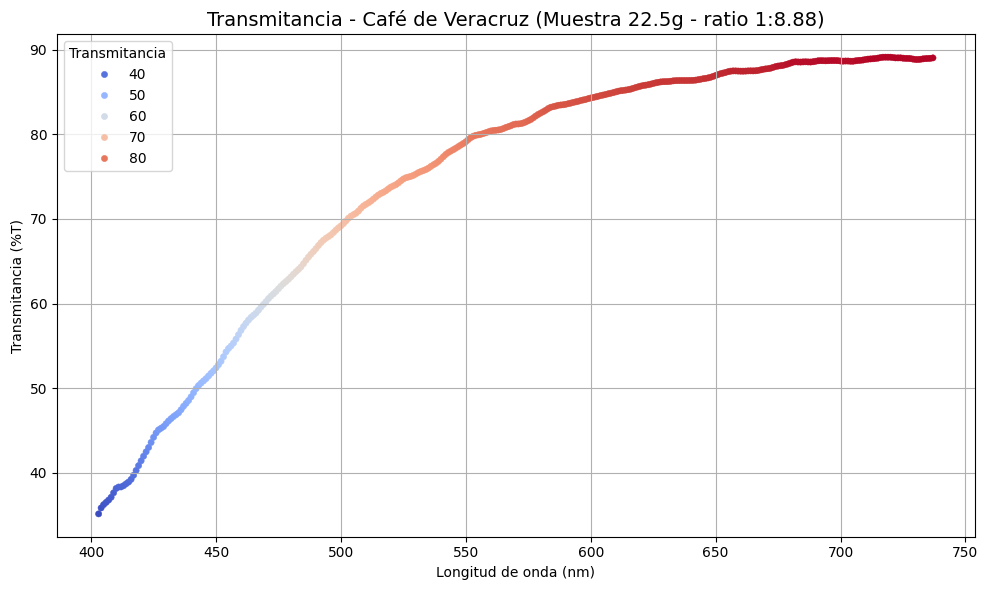

In [14]:
from scipy.signal import savgol_filter
import seaborn as sb
import matplotlib.pyplot as plt

#creamos una columna suavizada
datos["T_suave"] = savgol_filter(datos["%T"],window_length=19, polyorder=3)

#Graficamos scatterplot con sauvizado y gradiente de color 
plt.figure(figsize=(10,6))
sb.scatterplot(x="nm", y="T_suave", data=datos, hue="T_suave", palette="coolwarm", s=20, edgecolor=None)
plt.title("Transmitancia - Café de Veracruz (Muestra 22.5g - ratio 1:8.88)", fontsize=14)
plt.xlabel("Longitud de onda (nm)")
plt.ylabel("Transmitancia (%T)")
plt.legend(title="Transmitancia", loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()

